Name: Heshan Nipuna

IIT ID: 202004467

UoW ID: w1870508

In [ ]:
#Importing pandas library
import pandas as pd

In [ ]:
#Loading the classification dataset
data = pd.read_csv('/content/classification.csv')

In [ ]:
#displaying first ten rows
data.head(10)

Age  Sex  T_Stage  N_Stage  Grade  A_Stage  Tumor_Size  Estrogen_Status  \
0   68    1        0        0      2        1           4                1   
1   50    1        1        1      1        1          35                1   
2   58    1        2        2      1        1          63                1   
3   58    1        0        0      2        1          18                1   
4   47    1        1        0      2        1          41                1   
5   51    1        0        0      1        1          20                1   
6   51    1        0        0      0        1           8                1   
7   40    1        1        0      1        1          30                1   
8   40    1        3        2      2        1         103                1   
9   69    1        3        2      0        0          32                1   

   Progesterone_Status  Regional_Node_Examined  Reginol_Node_Positive  \
0                    1                      24                      1   
1                    1                      14                      5   
2                    1                      14                      7   
3                    1                       2                      1   
4                    1                       3                      1   
5                    1                      18                      2   
6                    1                      11                      1   
7                    1                       9                      1   
8                    1                      20                     18   
9                    1                      21                     12   

   Mortality_Status  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  
5                 0  
6                 0  
7                 1  
8                 0  
9                 0

In [ ]:
#prints the summary of dataset that includes the data type of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3985 entries, 0 to 3984
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Age                     3985 non-null   int64
 1   Sex                     3985 non-null   int64
 2   T_Stage                 3985 non-null   int64
 3   N_Stage                 3985 non-null   int64
 4   Grade                   3985 non-null   int64
 5   A_Stage                 3985 non-null   int64
 6   Tumor_Size              3985 non-null   int64
 7   Estrogen_Status         3985 non-null   int64
 8   Progesterone_Status     3985 non-null   int64
 9   Regional_Node_Examined  3985 non-null   int64
 10  Reginol_Node_Positive   3985 non-null   int64
 11  Mortality_Status        3985 non-null   int64
dtypes: int64(12)
memory usage: 373.7 KB


In [ ]:
# Declarin features X and target y for modeling
feature_cols = ['Age', 'Sex', 'T_Stage', 'N_Stage', 'Grade', 'A_Stage', 'Tumor_Size', 'Estrogen_Status', 'Progesterone_Status', 'Regional_Node_Examined', 'Reginol_Node_Positive']

X = data[feature_cols]
y = data['Mortality_Status']  #target variable

In [ ]:
#Import train_test_split to split data into training/test subsets
from sklearn.model_selection import train_test_split

In [ ]:
#Split data (80% training, 20% test) with reproducibility
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42, stratify=y)

In [ ]:
#Import VotingClassifier for ensemble learning
from sklearn.ensemble import VotingClassifier

In [ ]:
# Import base learners -Logistic Regression and Naive Bayes
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [ ]:
#Define base learners and initialize the ensemble
logreg = LogisticRegression(max_iter=1000)
nb = GaussianNB()

base_learners = [
    ('Logistic Regression', logreg),
    ('Naive Bayes', nb)
]

ensemble_learner = VotingClassifier(
    estimators=base_learners,
    voting='soft'
)

In [ ]:
#Train the ensemble model on the training data
ensemble_learner.fit(X_train, y_train)

VotingClassifier(estimators=[('Logistic Regression',
                              LogisticRegression(max_iter=1000)),
                             ('Naive Bayes', GaussianNB())],
                 voting='soft')

In [ ]:
# Predict on the test data
y_pred_ensemble_learner = ensemble_learner.predict(X_test)

In [ ]:
#Calculate and display test accuracy
from sklearn.metrics import accuracy_score

ensemble_learner_accuracy = accuracy_score(y_test, y_pred_ensemble_learner)

print ("The voting ensemble classifier accuracy is: ", ensemble_learner_accuracy)

The voting ensemble classifier accuracy is:  0.8255959849435383


Text(0.5, 1.0, 'Ensemble Learner Confusion Matrix')

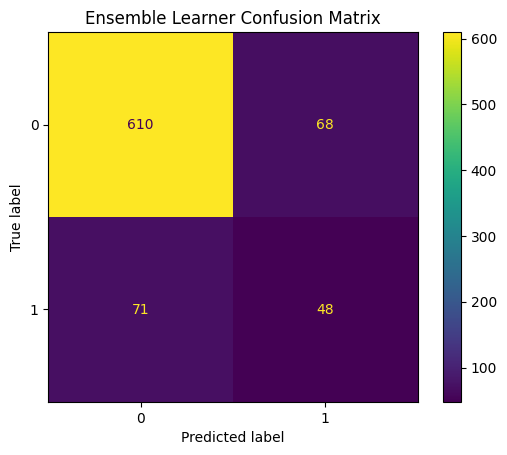

In [ ]:
#Generate and plot confusion matrix for ensemble
from sklearn.metrics import confusion_matrix

from sklearn.metrics import ConfusionMatrixDisplay

ensemble_learner_cm_test = confusion_matrix(y_test, y_pred_ensemble_learner, labels=ensemble_learner.classes_)

ensemble_learner_disp = ConfusionMatrixDisplay(ensemble_learner_cm_test,display_labels=ensemble_learner.classes_)

ensemble_learner_disp.plot()

ensemble_learner_disp.ax_.set_title("Ensemble Learner Confusion Matrix")

In [ ]:
#Generate classification report
from sklearn.metrics import classification_report

print("Ensemble Learner Classification Report \n", classification_report(y_test, y_pred_ensemble_learner))

Ensemble Learner Classification Report 
               precision    recall  f1-score   support

           0       0.90      0.90      0.90       678
           1       0.41      0.40      0.41       119

    accuracy                           0.83       797
   macro avg       0.65      0.65      0.65       797
weighted avg       0.82      0.83      0.82       797



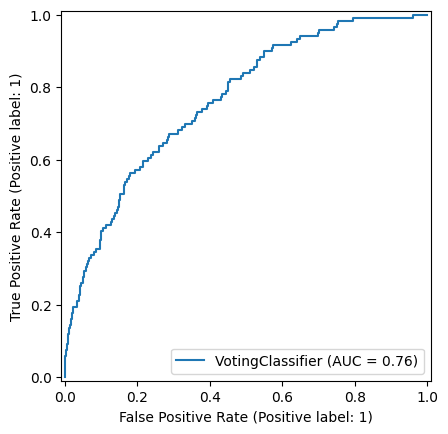

In [ ]:
#Plot AUC ROC curve for ensemble
from sklearn.metrics import RocCurveDisplay

roc_display = RocCurveDisplay.from_estimator(ensemble_learner, X_test, y_test)

In [ ]:
# Values only evauation matrics  for the report
# Confusion Matrix - values only
ensemble_cm = confusion_matrix(y_test, y_pred_ensemble_learner)
print("\nEnsemble Learner Confusion Matrix values:\n", ensemble_cm)

# Classification Report
print("\nEnsemble Learner Classification Report:\n", classification_report(y_test, y_pred_ensemble_learner))

# AUC-ROC Score
ensemble_probs = ensemble_learner.predict_proba(X_test)[:, 1]
ensemble_auc = roc_auc_score(y_test, ensemble_probs)
print("\nEnsemble Learner AUC-ROC Score:", ensemble_auc)



Ensemble Learner Confusion Matrix values:
 [[610  68]
 [ 71  48]]

Ensemble Learner Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90       678
           1       0.41      0.40      0.41       119

    accuracy                           0.83       797
   macro avg       0.65      0.65      0.65       797
weighted avg       0.82      0.83      0.82       797


Ensemble Learner AUC-ROC Score: 0.7640241937482957


In [ ]:
#importing pandas library
import pandas as pd

In [ ]:
# Load the regression dataset
data_reg = pd.read_csv('/content/regression.csv')

In [ ]:
data_reg['Survival_Months'] = data_reg['Survival_Months'].astype(int)

In [ ]:
#data types for all the variables in dataset
data_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 597 entries, 0 to 596
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Age                     597 non-null    int64
 1   Sex                     597 non-null    int64
 2   T_Stage                 597 non-null    int64
 3   N_Stage                 597 non-null    int64
 4   Grade                   597 non-null    int64
 5   A_Stage                 597 non-null    int64
 6   Tumor_Size              597 non-null    int64
 7   Estrogen_Status         597 non-null    int64
 8   Progesterone_Status     597 non-null    int64
 9   Regional_Node_Examined  597 non-null    int64
 10  Reginol_Node_Positive   597 non-null    int64
 11  Survival_Months         597 non-null    int64
 12  Mortality_Status        597 non-null    int64
dtypes: int64(13)
memory usage: 60.8 KB


In [ ]:
# Drops Survival_Months from input features to avoid data leakage.

X_reg = data_reg.drop('Survival_Months', axis=1)  # Input features
y_reg = data_reg['Survival_Months']  # Regression target

In [ ]:
#validating the target variable

print("Survival Months Column:", data_reg.columns.tolist())  # Must include 'Survival_Months'
print("Survival Months Stats:", y_reg.describe())            # Check distribution

Survival Months Column: ['Age', 'Sex', 'T_Stage', 'N_Stage', 'Grade', 'A_Stage', 'Tumor_Size', 'Estrogen_Status', 'Progesterone_Status', 'Regional_Node_Examined', 'Reginol_Node_Positive', 'Survival_Months', 'Mortality_Status']
Survival Months Stats: count    597.000000
mean      45.495812
std       24.041255
min        2.000000
25%       27.000000
50%       44.000000
75%       61.000000
max      102.000000
Name: Survival_Months, dtype: float64


In [ ]:
# Split regression data into training (80%) and test (20%)
X_train_reg,X_test_reg,y_train_reg,y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

In [ ]:
#importing descision tree regressor library
from sklearn.tree import DecisionTreeRegressor

In [ ]:
# Initialize a Decision Tree Regressor
DT_regressor = DecisionTreeRegressor()

# Train the model on regression training data
DT_regressor.fit(X_train_reg, y_train_reg)

DecisionTreeRegressor()

In [ ]:
# Predict survival months on test data
y_pred_reg = DT_regressor.predict(X_test_reg)

In [ ]:
# Evaluate regression performance
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test_reg, y_pred_reg))
print('MSE:', metrics.mean_squared_error(y_test_reg, y_pred_reg))
print('R2:', metrics.r2_score(y_test_reg, y_pred_reg))

MAE: 28.4
MSE: 1259.1
R2: -1.7727207455361835


In [ ]:
# importing liraries for generate the tree
from sklearn import tree
from matplotlib import pyplot as plt

In [ ]:
# generating the full descision tree
Tree_figure = plt.figure(figsize=(200,100))

DT_Graph = tree.plot_tree(DT_regressor, feature_names=list(X_train_reg.columns), filled=True)

In [ ]:
# saving the unpruned descision tree
Tree_figure.savefig("decision_tree_unpruned.svg")

In [ ]:
# Tuned Decision Tree
DT2 = DecisionTreeRegressor(max_depth=3)

DT2.fit(X_train_reg, y_train_reg)

y_pred_reg_tuned = DT2.predict(X_test_reg)

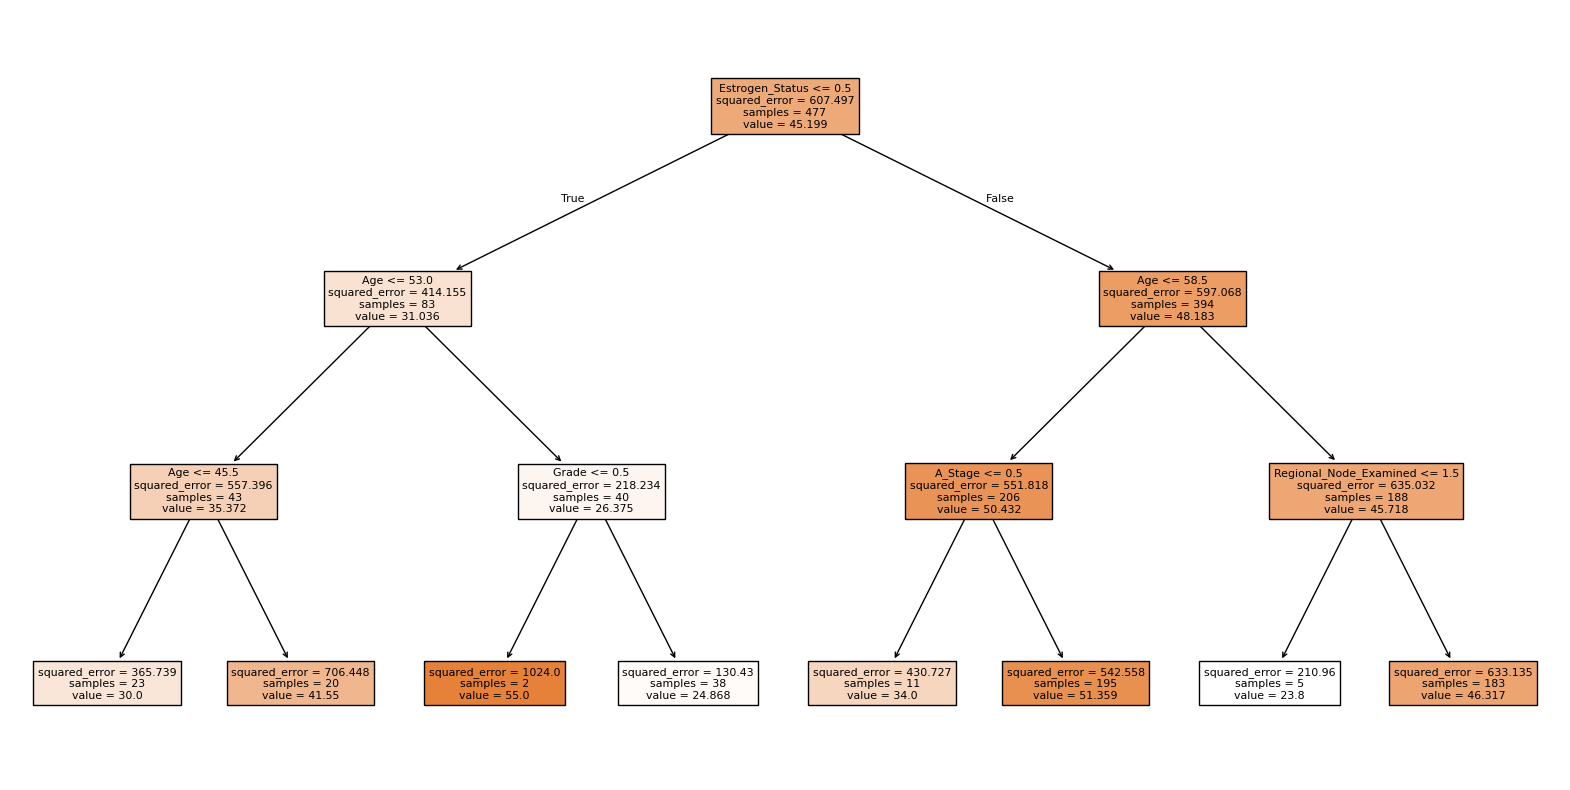

In [ ]:
# generating the full descision tree
Tree_figure_tuned = plt.figure(figsize=(20,10))

DT_Graph = tree.plot_tree(DT2, feature_names=list(X_train_reg.columns), filled=True)

In [ ]:
#saving the pruned descision tree
Tree_figure_tuned.savefig("decision_tree_pruned.svg")

In [ ]:
# Evaluation
print("Depth of Pruned Tree:", DT2.get_depth())

print("MAE:", metrics.mean_absolute_error(y_test_reg, y_pred_reg_tuned))

print("MSE:", metrics.mean_squared_error(y_test_reg, y_pred_reg_tuned))

print("R²:", metrics.r2_score(y_test_reg, y_pred_reg_tuned))

Depth of Pruned Tree: 3
MAE: 17.270747190327647
MSE: 485.9049182793065
R²: -0.07003307701619965


In [ ]:
# assigning values for based on patient B002565 data

patient_data = [
    29,   # Age
    1,    # Sex (Female)
    2,    # T_Stage (T3)
    0,    # N_Stage (N1)
    1,    # Grade (2)
    1,    # A_Stage (Regional)
    41,   # Tumor_Size
    0,    # Estrogen_Status (Negative)
    1,    # Progesterone_Status (Positive)
    5,    # Regional_Node_Examined
    1,    # Regional_Node_Positive
    0     # Alive
]

In [ ]:
# Predicting survival months
predicted_survival = DT2.predict([patient_data])
print(f"Predicted Survival Months: {predicted_survival[0]}")

Predicted Survival Months: 30.0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
